Project description:-

Diabetes is a chronic disease that affects millions worldwide, necessitating early detection and effective management to mitigate complications. This project leverages supervised machine learning algorithms to analyze the "diabetes.csv" dataset, which includes various health indicators such as blood pressure, cholesterol levels, BMI, physical activity, and lifestyle habits. The goal is to predict the likelihood of diabetes (categorized as no diabetes, prediabetes, or diabetes) based on these features.

Using algorithms like Logistic Regression, Random Forest, and Support Vector Machines (SVM), we classify patients into risk categories and evaluate model performance using metrics such as accuracy, precision, recall, and F1-score. Feature importance analysis identifies key predictors (e.g., BMI, high blood pressure) to enhance interpretability. The project also addresses challenges like class imbalance and data preprocessing to ensure robustness.

The outcomes aim to provide a scalable tool for healthcare professionals to identify high-risk individuals early, enabling timely interventions. This work highlights the potential of machine learning in improving diabetes prediction and contributing to preventive healthcare strategies


column description:-

ID-ID-Integer-Patient ID	
Diabetes_binary	-Target	Binary	-0 = no diabetes 1 = prediabetes or diabetes	
HighBP-Feature-Binary	-0 = no high BP 1 = high BP		
HighChol-Feature-Binary	-0 = no high cholesterol 1 = high cholesterol		
CholCheck-Feature-Binary		0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years		
BMI	Feature	Integer	-Body Mass Index		
Smoker-Feature	-Binary		Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes	
Stroke-Feature-Binary	-(Ever told) you had a stroke. 0 = no 1 = yes		
HeartDiseaseorAttack-Feature-Binary	-coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes		
PhysActivity-Feature-Binary	-physical activity in past 30 days - not including job 0 = no 1 = yes	
Fruits-Feature-Binary	-Consume Fruit 1 or more times per day 0 = no 1 = yes		
Veggies-Feature-Binary	-Consume Vegetables 1 or more times per day 0 = no 1 = yes		
HvyAlcoholConsump-Feature-Binary	-Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no 1 = yes		
AnyHealthcare-Feature-Binary	-Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes		
NoDocbcCost-Feature-Binary	-Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes		
GenHlth-Feature-Integer	-Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor		
MentHlth-Feature-Integer	-Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days		
PhysHlth-Feature-Integer	-Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days		
DiffWalk-Feature-Binary	-Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes		
Sex-Feature-Binary-Sex	0 = female 1 = male		
Variable Name	Role	Type	Demographic	Description	Units	Missing Values
Age-Feature-Integer-Age	13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older		
Education-Feature-Integer-Education Level	Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only kindergarten 2 = Grades 1 through 8 (Elementary) 3 = Grades 9 through 11 (Some high school) 4 = Grade 12 or GED (High school graduate) 5 = College 1 year to 3 years (Some college or technical school) 6 = College 4 years or more (College graduate)		
Income-Feature-Integer-Income	Income scale (INCOME2 see codebook) scale 1-8 1 = less than $10,000 5 = less than $35,000 8 = $75,000 or more		





In [24]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore


In [3]:
#load dataset
data =pd.read_csv("diabetes.csv")
data
df=pd.DataFrame(data)
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,1,45,0,0,0,0,1,...,1,0,3,0,5,0,1,5,6,7
253676,2,1,1,1,18,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,0,1,28,0,0,0,1,1,...,1,0,1,0,0,0,0,2,5,2
253678,0,1,0,1,23,0,0,0,0,1,...,1,0,3,0,0,0,1,7,5,1


In [7]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,Education_4,Education_5,Education_6,Income_2,Income_3,Income_4,Income_5,Income_6,Income_7,Income_8
0,0,1,1,1,40,1,0,0,0,0,...,True,False,False,False,True,False,False,False,False,False
1,0,0,0,0,25,1,0,0,1,0,...,False,False,True,False,False,False,False,False,False,False
2,0,1,1,1,28,0,0,0,0,1,...,True,False,False,False,False,False,False,False,False,True
3,0,1,0,1,27,0,0,0,1,1,...,False,False,False,False,False,False,False,True,False,False
4,0,1,1,1,24,0,0,0,1,1,...,False,True,False,False,False,True,False,False,False,False


In [11]:
# view dimensions of dataset

df.shape

(253680, 32)

In [12]:
df.info()#View summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 32 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [13]:
# check missing values in variables

df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education_2             0
Education_3             0
Education_4             0
Education_5             0
Education_6             0
Income_2                0
Income_3                0
Income_4                0
Income_5                0
Income_6                0
Income_7                0
Income_8                0
dtype: int64

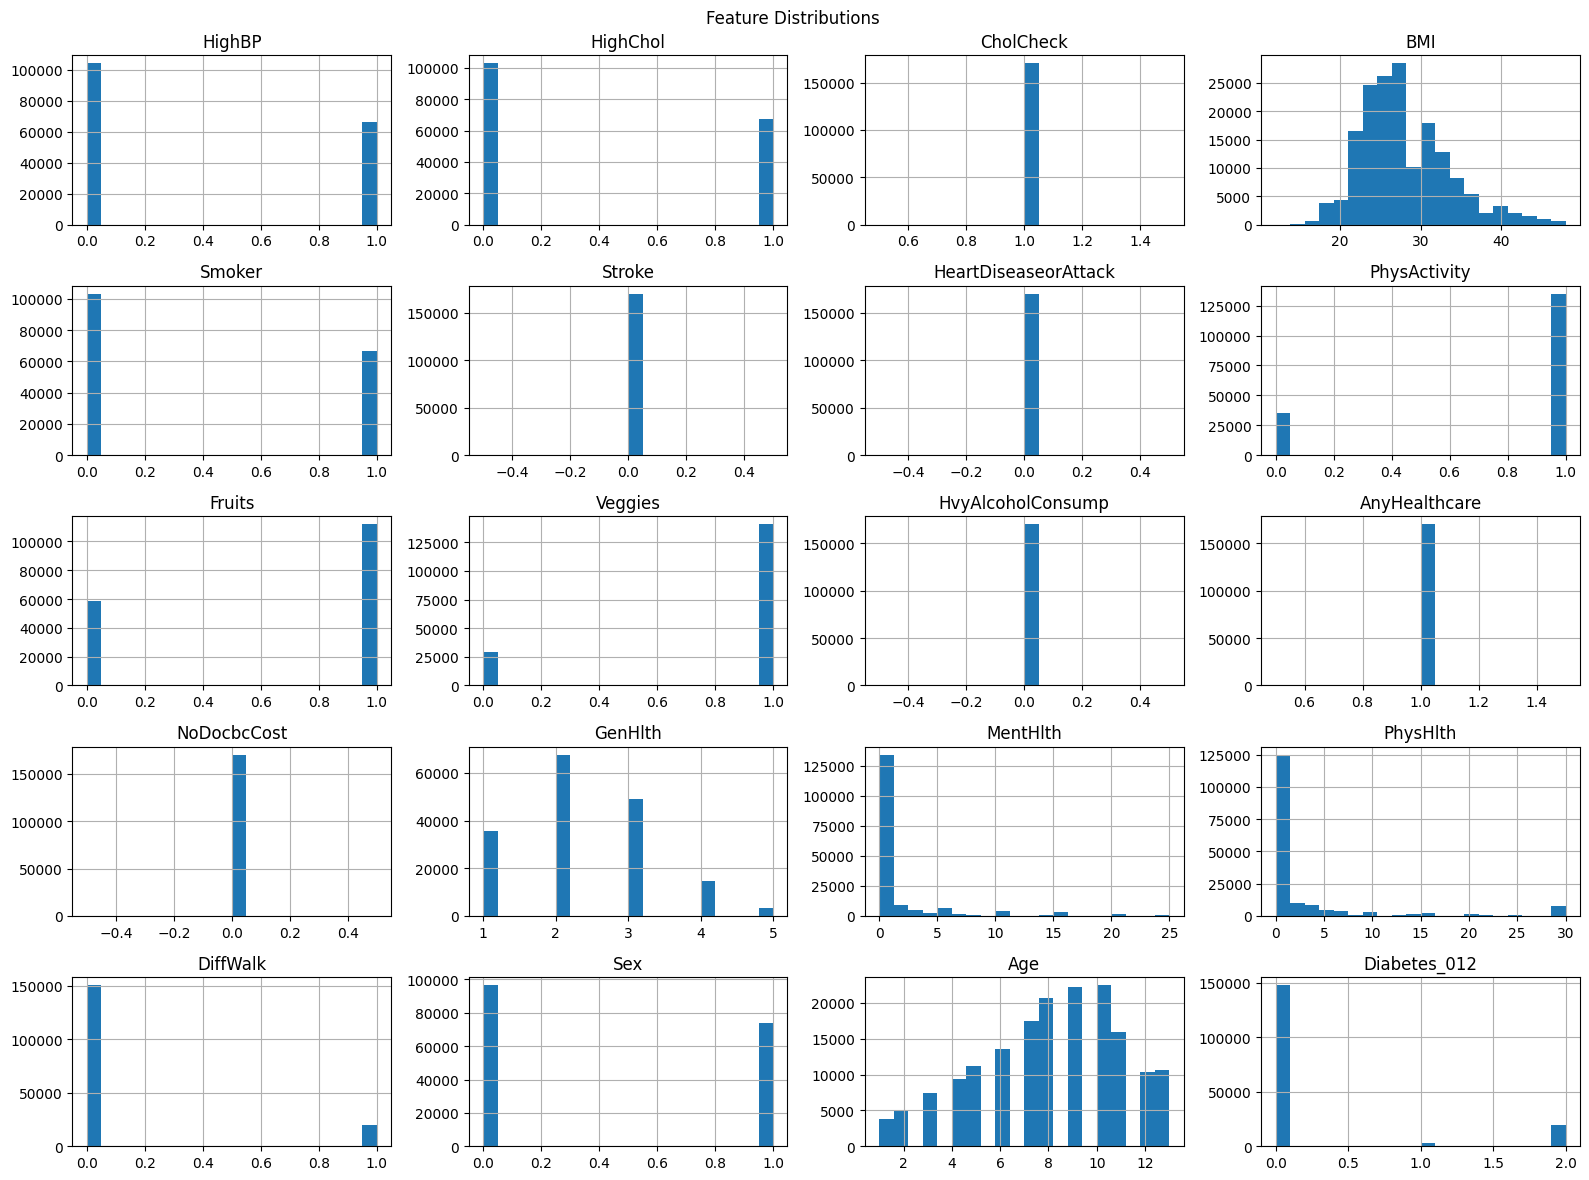

In [41]:
#Histogram for each feature
df.hist(figsize=(16, 12), bins=20)
plt.suptitle("Feature Distributions ")
plt.tight_layout()
plt.show()

In [27]:


#  Convert all columns to numeric (coerce errors = convert non-numeric to NaN)
df = df.apply(pd.to_numeric, errors='coerce')

# S Drop rows with NaN values (after coercion)
df = df.dropna()

# Separate features and target
X = df.drop("Diabetes_012", axis=1)
y = df["Diabetes_012"]

# Compute Z-scores
z_scores = np.abs(zscore(X.values.astype(float)))

# Define threshold and create mask
threshold = 3
mask = (z_scores < threshold).all(axis=1)
# Apply mask
X_no_outliers = X[mask]
y_no_outliers = y[mask]

print(f"Original dataset size: {X.shape[0]}")
print(f"After outlier removal: {X_no_outliers.shape[0]}")

Original dataset size: 253680
After outlier removal: 170236


In [34]:
df_cleaned = pd.concat([X_no_outliers.reset_index(drop=True), y_no_outliers.reset_index(drop=True)], axis=1)
df=df_cleaned
df

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_012
0,1,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,0,9,4,3,0
1,1,0,1,27,0,0,0,1,1,1,...,0,2,0,0,0,0,11,3,6,0
2,1,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,0,11,5,4,0
3,1,1,1,25,1,0,0,1,1,1,...,0,2,0,2,0,1,10,6,8,0
4,1,0,1,30,1,0,0,0,0,0,...,0,3,0,14,0,0,9,6,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170231,1,0,1,42,0,0,0,1,1,1,...,0,3,14,4,0,1,3,6,8,0
170232,0,0,1,27,0,0,0,0,0,1,...,0,1,0,0,0,0,3,6,5,0
170233,1,1,1,45,0,0,0,0,1,1,...,0,3,0,5,0,1,5,6,7,0
170234,0,0,1,28,0,0,0,1,1,0,...,0,1,0,0,0,0,2,5,2,0


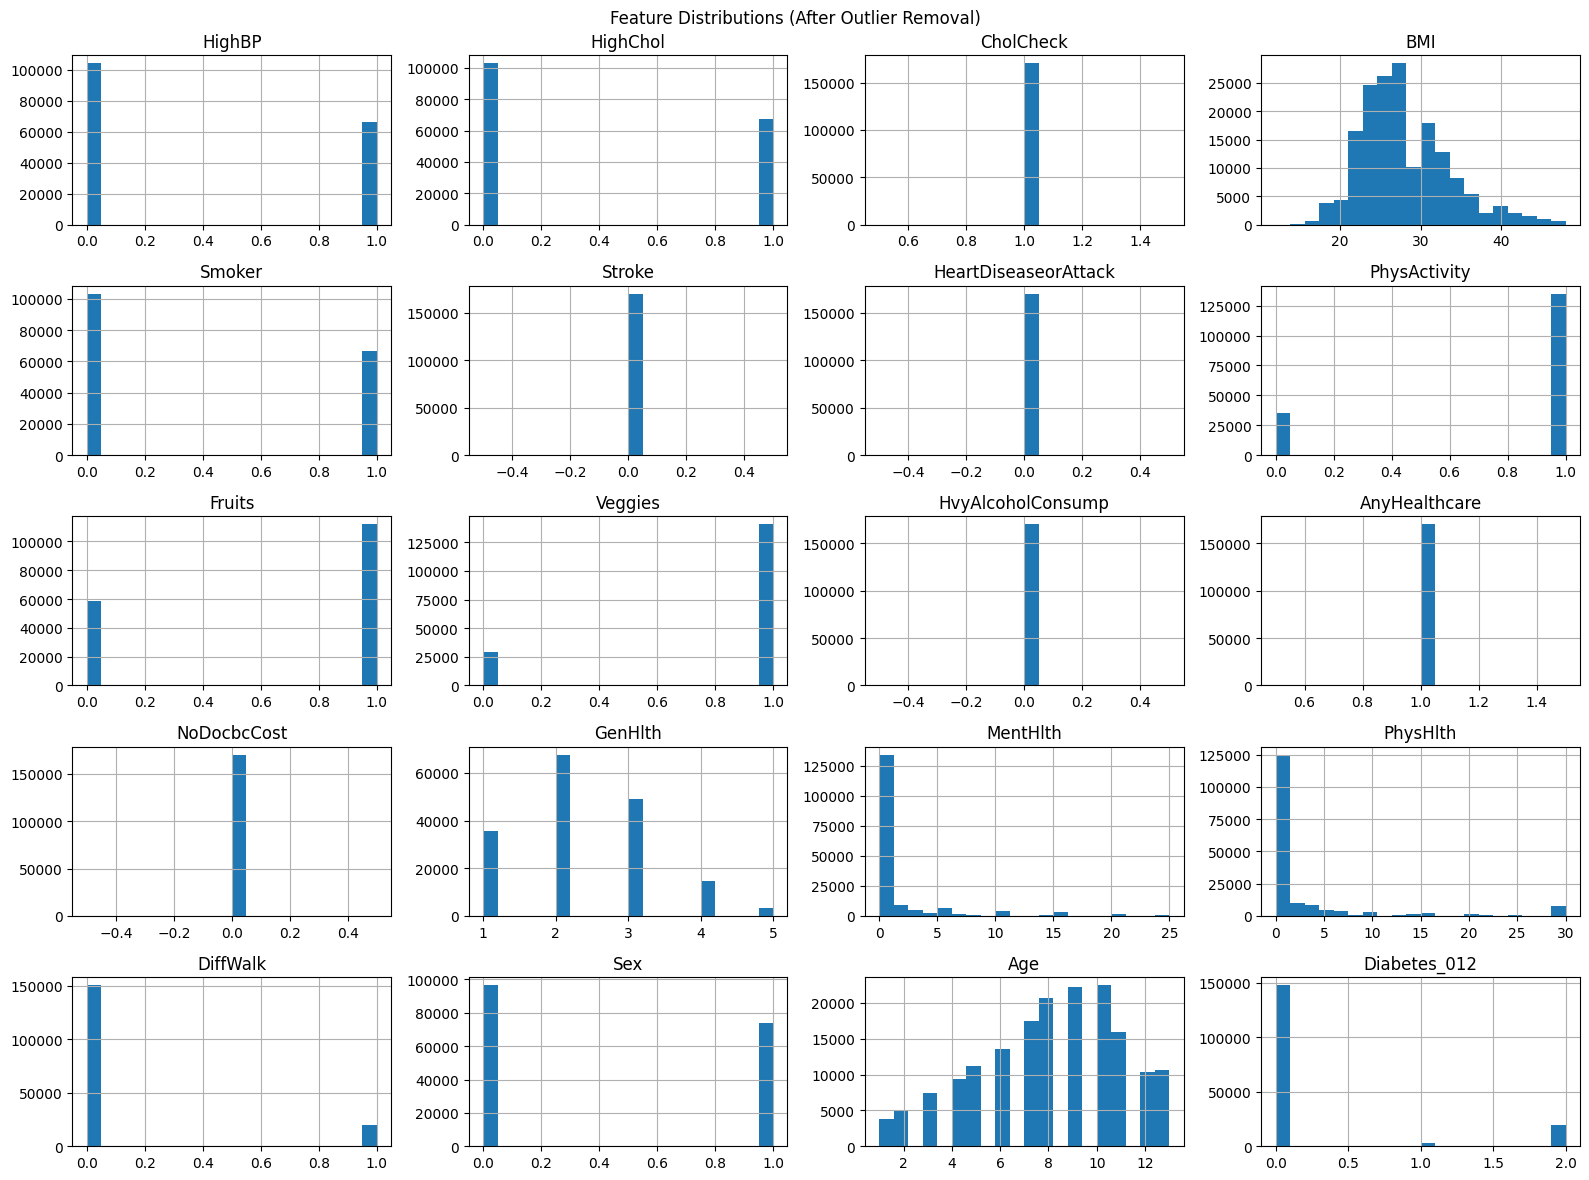

In [40]:
#Histogram for each feature
df.hist(figsize=(16, 12), bins=20)
plt.suptitle("Feature Distributions (After Outlier Removal)")
plt.tight_layout()
plt.show()

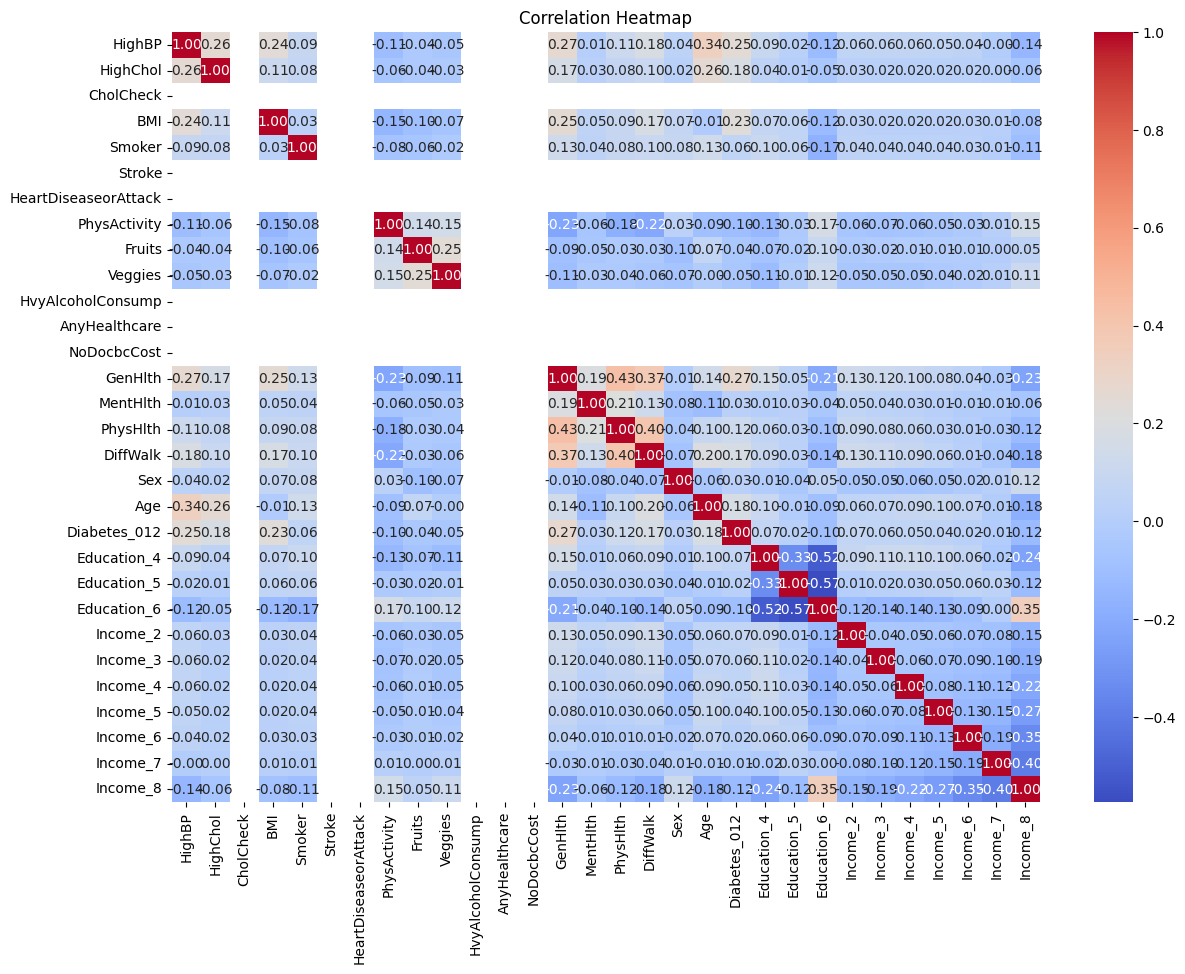

In [42]:
#Correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

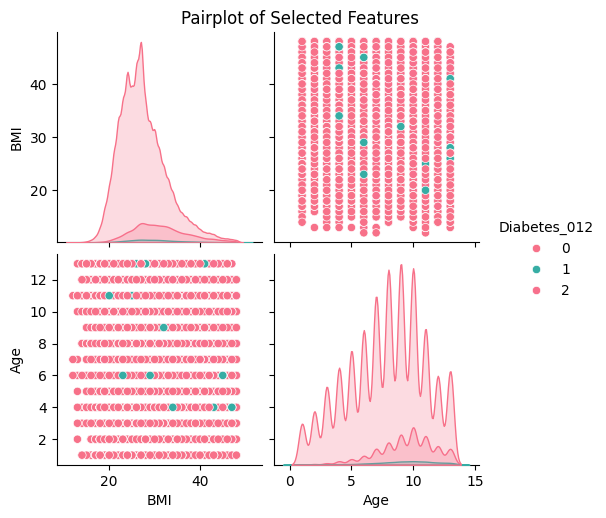

In [45]:
# Pairplot (for selected features to avoid clutter)
selected_features = ['BMI', 'Age', 'Diabetes_012']
sns.pairplot(df[selected_features], hue='Diabetes_012', palette='husl')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

In [35]:
df.nunique().sort_values()#Identify Categorical Features

CholCheck                1
Stroke                   1
HeartDiseaseorAttack     1
AnyHealthcare            1
HvyAlcoholConsump        1
NoDocbcCost              1
Smoker                   2
HighBP                   2
Fruits                   2
PhysActivity             2
HighChol                 2
Veggies                  2
Sex                      2
DiffWalk                 2
Diabetes_012             3
Education                4
GenHlth                  5
Income                   8
Age                     13
MentHlth                26
PhysHlth                31
BMI                     37
dtype: int64

In [36]:
df = pd.get_dummies(df, columns=['Education', 'Income'], drop_first=True)#one-hot encoding to make non binary features to catogorical

In [37]:
df

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,Education_4,Education_5,Education_6,Income_2,Income_3,Income_4,Income_5,Income_6,Income_7,Income_8
0,1,1,1,40,1,0,0,0,0,1,...,True,False,False,False,True,False,False,False,False,False
1,1,0,1,27,0,0,0,1,1,1,...,False,False,False,False,False,False,False,True,False,False
2,1,1,1,24,0,0,0,1,1,1,...,False,True,False,False,False,True,False,False,False,False
3,1,1,1,25,1,0,0,1,1,1,...,False,False,True,False,False,False,False,False,False,True
4,1,0,1,30,1,0,0,0,0,0,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170231,1,0,1,42,0,0,0,1,1,1,...,False,False,True,False,False,False,False,False,False,True
170232,0,0,1,27,0,0,0,0,0,1,...,False,False,True,False,False,False,True,False,False,False
170233,1,1,1,45,0,0,0,0,1,1,...,False,False,True,False,False,False,False,False,True,False
170234,0,0,1,28,0,0,0,1,1,0,...,False,True,False,True,False,False,False,False,False,False


In [38]:
X = X_no_outliers 
y = y_no_outliers 

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the feature set
X_normalized = scaler.fit_transform(X)

# Convert back to DataFrame for readability
X_normalized = pd.DataFrame(X_normalized, columns=X.columns)

# Optional: Combine normalized features with target
df_normalized = pd.concat([X_normalized, y.reset_index(drop=True)], axis=1)

print(df_normalized.head())

   HighBP  HighChol  CholCheck       BMI  Smoker  Stroke  \
0     1.0       1.0        0.0  0.777778     1.0     0.0   
1     1.0       0.0        0.0  0.416667     0.0     0.0   
2     1.0       1.0        0.0  0.333333     0.0     0.0   
3     1.0       1.0        0.0  0.361111     1.0     0.0   
4     1.0       0.0        0.0  0.500000     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  NoDocbcCost  \
0                   0.0           0.0     0.0      1.0  ...          0.0   
1                   0.0           1.0     1.0      1.0  ...          0.0   
2                   0.0           1.0     1.0      1.0  ...          0.0   
3                   0.0           1.0     1.0      1.0  ...          0.0   
4                   0.0           0.0     0.0      0.0  ...          0.0   

   GenHlth  MentHlth  PhysHlth  DiffWalk  Sex       Age  Education    Income  \
0     1.00      0.72  0.500000       1.0  0.0  0.666667   0.333333  0.285714   
1     0.25      0.00  

In [47]:
# Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_pca = pca.fit_transform(X_normalized)

#  Print PCA summary
print(f"Original features: {X.shape[1]}")
print(f"Reduced features: {X_pca.shape[1]}")
print("Explained variance ratio (each component):")
print(pca.explained_variance_ratio_)


Original features: 21
Reduced features: 12
Explained variance ratio (each component):
[0.18790928 0.1379577  0.12223788 0.11383608 0.09294003 0.07877401
 0.06181606 0.05426032 0.04263386 0.02780751 0.02297586 0.02125133]


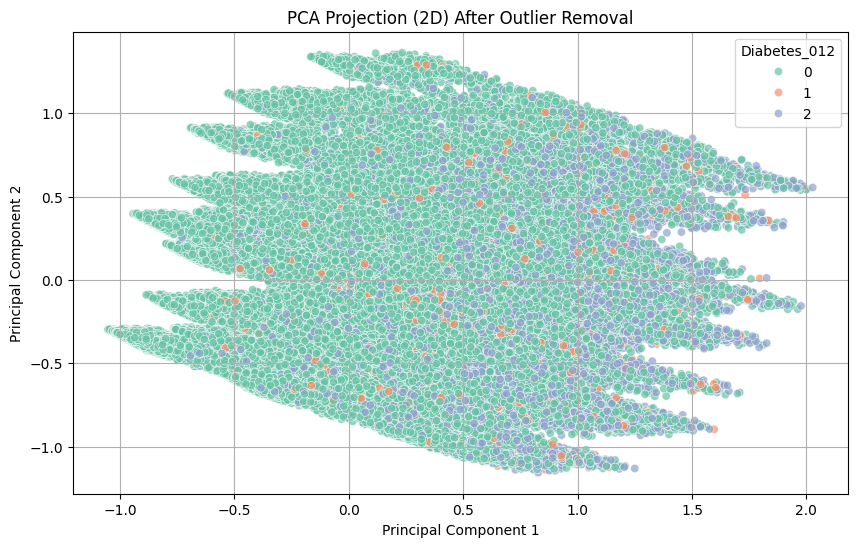

In [49]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_no_outliers)

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)  # This will now be (n, 2)

# Create DataFrame with correct shape
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Diabetes_012'] = y_no_outliers.values


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Diabetes_012', palette='Set2', alpha=0.7)
plt.title('PCA Projection (2D) After Outlier Removal')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()